In [13]:
import matplotlib
import os
import numpy
import json
import collections
from matplotlib.pyplot import cm
import numpy as np

In [129]:
title = "Weak Scaling In_Out v2.10 SolH Q1dq0"
# Below are the filenames to grab data from
bases = [
# "./Results_Weak_V29_DIM_3_BASE_16_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Magnus/",
# "./Results_Weak_V29_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Magnus/",
# "./Results_Weak_V29_DIM_3_BASE_64_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Magnus/",
# "./Results_Weak_V29_DIM_3_BASE_16_ORDER_2_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Magnus/",
# "./Results_Weak_V29_SolDB3d_DIM_3_BASE_16_ORDER_2_TOL_1e-11_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
# "./Results_Weak_V29_system_petsc_high_mem_DIM_3_BASE_16_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Gadi/",
# "./Results_Weak_V29_system_petsc_high_mem_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Gadi/",
# "./Results_Weak_V29_system_petsc_high_mem_DIM_3_BASE_64_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Gadi/",
# "./Results_Weak_V29_system_petsc_high_mem_DIM_3_BASE_8_ORDER_2_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Gadi/",
# "./Results_Weak_V29_system_petsc_high_mem_DIM_3_BASE_16_ORDER_2_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Gadi/",
# "./Results_Weak_V210_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Magnus/",
"./Results_Weak_V210_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_1_MODEL_SolH_Magnus/",
# "./Results_Weak_V210_noadvdiffnoswarmadv_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
# "./Results_Weak_V210_noadvdiffnoswarmadv_DIM_3_BASE_32_ORDER_1_TOL_1e-7_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
# "./Results_Weak_V210_noadvdiffnoswarmadv_DIM_3_BASE_16_ORDER_2_TOL_1e-8_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
# "./Results_Weak_V210_noadvdiffnoswarmadv_DIM_3_BASE_16_ORDER_2_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
# "./Results_Weak_V210_retest_DIM_3_BASE_16_ORDER_2_TOL_1e-11_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
# "./Results_Weak_V290_retest_DIM_3_BASE_16_ORDER_2_TOL_1e-11_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",

]

In [130]:
# If the following is true, the graph datasets are coloured 
# by routine name (for example, Stokes.solve()) . Otherwise, it's done by
# set name (for example, "Magnus 16^3 Order 1" )
graph_by_routine = True

if not graph_by_routine:
    # titles for the graph legend
    graph_config = [
    ("Magnus 16^3 Order 1",  "green", "--"),
    ("Magnus 32^3 Order 1",   "blue", "--"),
    ("Magnus 64^3 Order 1",    "red", "--"),
    ("Magnus 16^3 Order 2", "yellow", "--"),
    ("Gadi   16^3 Order 1",  "green", "-"),
    ("Gadi   32^3 Order 1",   "blue", "-"),
    ("Gadi   64^3 Order 1",    "red", "-"),
    ("Gadi    8^3 Order 2", "purple", "-"),
    ("Gadi   16^3 Order 2", "yellow", "-"),
    ]
    keys       = [data[0] for data in graph_config]
    cols       = [data[1] for data in graph_config]
    linestyles = [data[2] for data in graph_config]
else:
    linestyles = ['-','--',':','-','--',':','-','--',':']

linewidths = [1.,1.0,1.0,1.,1.0,1.0,1.,1.0,1.0]

# the following can limit the range of proc counts viewed
maxproc = 9999999
minproc = 0

# if true, use listed functions below, otherwise auto find slowest funcs
funcs_explicit = True
funcs_auto_how_many = 7
if funcs_explicit:
    funcs = [
     'FeMesh.load()',
     'FeMesh.save()',
     'MeshVariable.load()',
     'MeshVariable.save()',
     'Swarm.load()',
     'Swarm.save()',
     'SwarmVariable.load()',
     'SwarmVariable.save()',
     'Figure.save()',
     'StokesSolver.solve()',
    ]

ignore_funcs = [
#     'Container_Launch_Time',
]

In [131]:
!find . -name Results_\* -type d

./Results_Weak_V210_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus
./Results_Weak_V210_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Magnus
./Results_Weak_V210_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_1_MODEL_SolH_Magnus
./Results_Weak_V210_noadvdiffnoswarmadv_DIM_3_BASE_16_ORDER_2_TOL_1e-8_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus
./Results_Weak_V210_noadvdiffnoswarmadv_DIM_3_BASE_16_ORDER_2_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus
./Results_Weak_V210_noadvdiffnoswarmadv_DIM_3_BASE_32_ORDER_1_TOL_1e-10_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus
./Results_Weak_V210_noadvdiffnoswarmadv_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus
./Results_Weak_V210_noadvdiffnoswarmadv_DIM_3_BASE_32_ORDER_1_TOL_1e-7_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus
./Results_Weak_V210_noadvdiffnoswarmadv_DIM_3_BASE_32_ORDER_1_TOL_1e-8_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus
./Results_Weak_V210_noadvdiff_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_

In [132]:
# Each simulation stores it's timing data in a different file. 
# Here we grab all required files.
# Note wildcards, glob.glob() etc. 
nrpoc_set = set()
import glob
nprocmax = 0
done = False
def grab_files(base):
    global nprocmax
    global maxconfig
    global done
    jsonguy = collections.defaultdict(lambda: [])
    for filename in glob.glob(base+"*.json"):
        with open(filename, 'r') as f:
            data = json.load(f)
            splitbase = filename.split(base)
            splitfile = splitbase[1].split("_")
            res = int(splitfile[1])
            nproc = int(splitfile[3])
            if nproc < minproc:
                continue
            if nproc > maxproc:
                continue
            nrpoc_set.add(nproc)
            print(filename)
#             print("VRMS = {}".format(data[u'Other_data']["vrms"]))
#             print("Res = {}".format(res))
#             print("nproc = {}".format(nproc))
            jsonguy[(res,nproc)].append(data)
            if nproc>nprocmax and not done:
                nprocmax = nproc
                maxconfig = (res,nproc)
    done = True
    return jsonguy
jsons = []
for baseguy in bases: 
    jsons.append(grab_files(baseguy))

./Results_Weak_V210_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_1_MODEL_SolH_Magnus/Res_128_Nproc_64_JobID_5197932.json
./Results_Weak_V210_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_1_MODEL_SolH_Magnus/Res_256_Nproc_512_JobID_5197933.json
./Results_Weak_V210_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_1_MODEL_SolH_Magnus/Res_320_Nproc_1000_JobID_5197934.json
./Results_Weak_V210_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_1_MODEL_SolH_Magnus/Res_32_Nproc_1_JobID_5197930.json
./Results_Weak_V210_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_1_MODEL_SolH_Magnus/Res_64_Nproc_8_JobID_5197931.json


In [133]:
# Lets add in other_timing data
# This is data not recorded by `uw.timing` module, and is explicitly 
# recorded into the outputted json file.  This is used for Python load time
# and container start time. 
for jsonguy in jsons:
    for key,listjsons in jsonguy.items():
        for guy in listjsons:
            othertiming =  guy[u'Other_timing']
            for otherk, otherv in othertiming.items():
                othertiming[otherk] = [1, otherv]
            guy.update(othertiming)

In [134]:
if not funcs_explicit:
    guy32 = jsons[0][maxconfig][0]
    list32 = []
    for key,val in guy32.items():
        if isinstance(val,list):
            list32.append([key,val[1]/float(val[0])])
    sortedlist = sorted(list32, key=lambda x: x[1], reverse=True) 
    funcs = []
    totmax = funcs_auto_how_many
    tot = 0
    for guy in sortedlist:
        tot+=1
        if tot > totmax:
            break
        if guy[0] in ignore_funcs:
            continue
        funcs.append(guy[0])
funcs

['FeMesh.load()',
 'FeMesh.save()',
 'MeshVariable.load()',
 'MeshVariable.save()',
 'Swarm.load()',
 'Swarm.save()',
 'SwarmVariable.load()',
 'SwarmVariable.save()',
 'Figure.save()',
 'StokesSolver.solve()']

In [135]:
# Collect data from jsons
def collect_data_from_jsons(jsonguy):
    funcdat = collections.defaultdict(lambda: [])
    for key,data in jsonguy.items():                      # all dicts
        for func in funcs:                                # funcs we want to look at
            for datum in data:                            # all runs for each res/nproc combo
                if func in datum:
                    datguy = datum[func]
                    dat = (key[0],key[1],datguy[1]/float(datguy[0]))
                    funcdat[func].append(dat)
                else:
                    print("{} not found in {}. Skipping".format(func,key))
                    continue
    return funcdat
funcdats = []
for jsonguy in jsons:
    result = collect_data_from_jsons(jsonguy)
    if result:
        funcdats.append(result)

In [136]:
# get averages if multiple datasets for given nproc/res
def get_averages(funcdatguy):
    avfuncdat = collections.defaultdict(lambda: [])
    for key, value in funcdatguy.items():
        counts = collections.defaultdict(lambda: [0,0.])
        for entry in value:
            dat = counts[entry[1]]
            dat[0]+=1
            dat[1]+=entry[2]
        for nproc, countdat in counts.items():
            avfuncdat[key].append((0,nproc,countdat[1]/float(countdat[0])))
    return avfuncdat
avfuncdats = []
for funcdat in funcdats:
    avfuncdats.append(get_averages(funcdat))

In [137]:
dats = avfuncdats

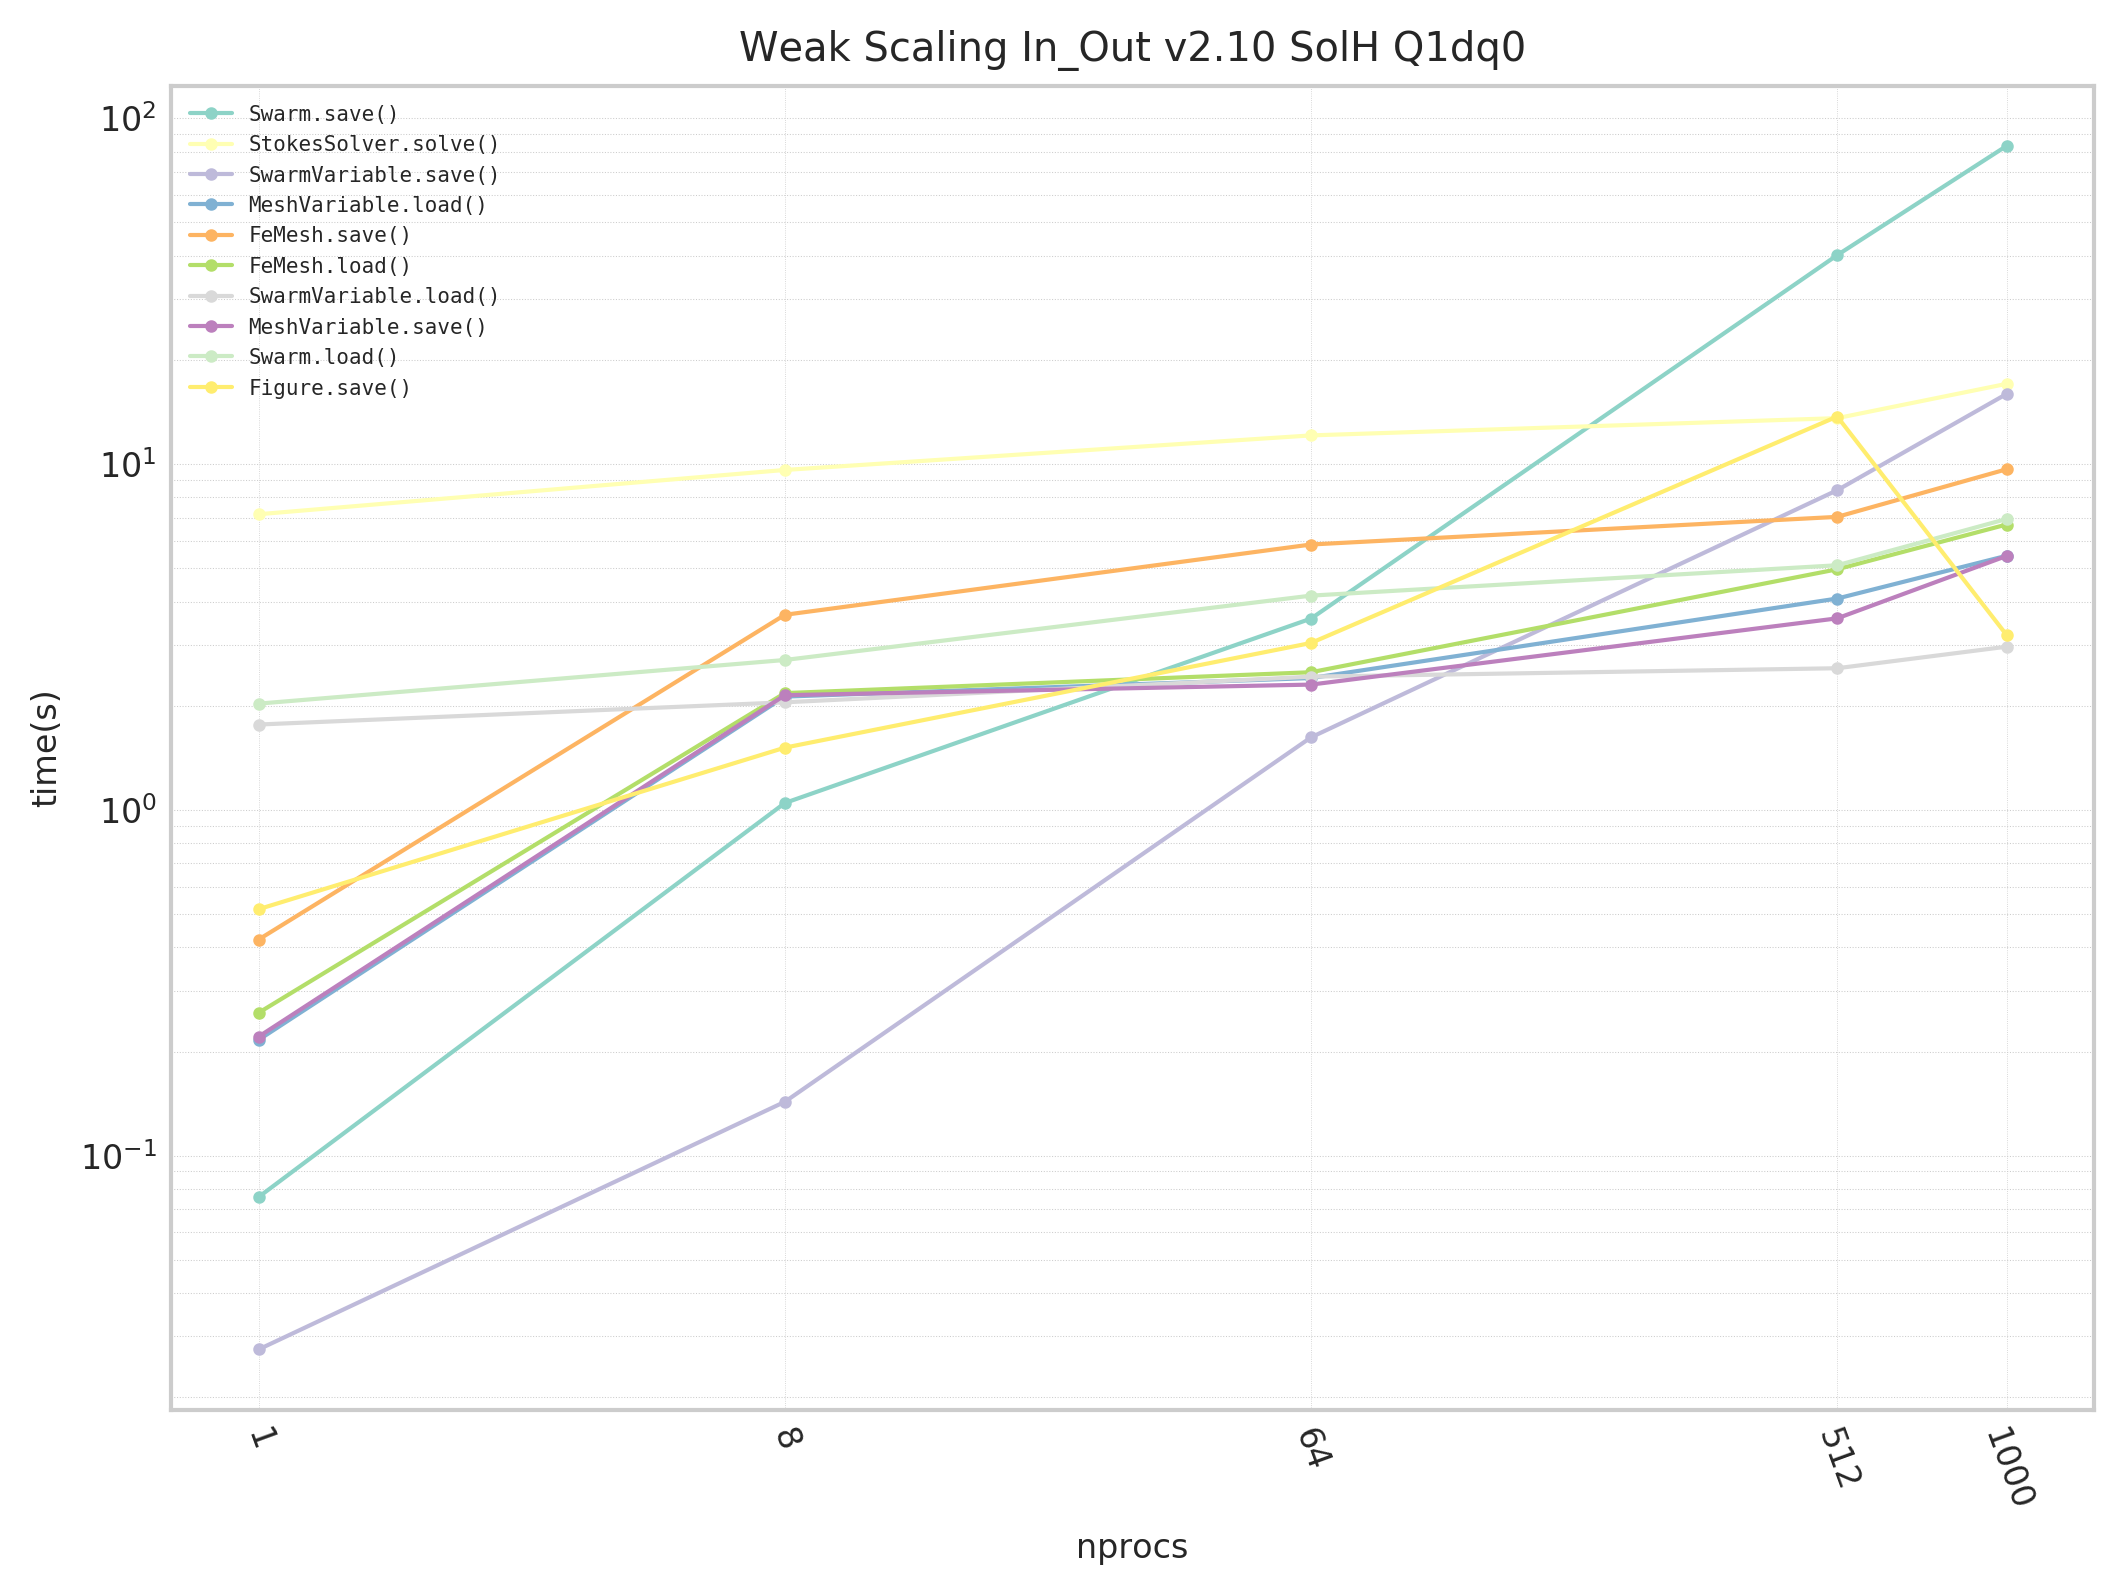

In [138]:
%matplotlib inline
# plot
import matplotlib.pyplot as plt
font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 8}

matplotlib.rc('font', **font)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(dpi=300, figsize=(8.27, 11.69/2.))
ax = plt.subplot(1,1,1,xscale='log', yscale='log')
# ax.set_title("Save operations")
ax.set_xlabel("nprocs")
ax.set_ylabel("time(s)")
sortedprocs = sorted(list(nrpoc_set))
ax.xaxis.set_ticks(sortedprocs)
ax.xaxis.set_ticklabels(sortedprocs, rotation=-70)
ax.grid(axis="y", which="both",linestyle=':',linewidth=0.25)
ax.grid(axis="x", linestyle=':',linewidth=0.2)
plt.title(title)

for index, dat in enumerate(dats):
    colind = 0
    for key, value in dat.items():
        xy = []
        for entry in value:
            xy.append((entry[1],entry[2]))
        sorteddat = sorted(xy, key=lambda x: x[0], reverse=False) 
        if graph_by_routine:
            cols = cm.Set3(np.linspace(0,1,len(funcs)))
            if key=='Total_Runtime':
                col = "black"
                lw  = 1.5
            else:
                col = cols[colind]
                lw = 0.5
            keyg = key
            if index!=0: keyg=None
        else:
            keyg = keys[index]
            col  = cols[index]
            
        ax.plot([x[0] for x in sorteddat],[x[1] for x in sorteddat], label=keyg, color=col, linestyle=linestyles[index], marker='o', markersize=2,linewidth=linewidths[index])
        colind+=1
ax.legend( prop={'family': 'monospace', 'size':5})

In [139]:
fig.savefig(title+".png")